# Computer Vision Fundamentals: OpenCV with Python

OpenCV (Open Source Computer Vision) is a library of programming functions mainly aimed at real-time computer vision. OpenCV is written in C++, but there are bindings in Python, Java and Matlab. So, here we will perform some basic digital image processing operations using OpenCV as a Python module.   

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Dealing with images...

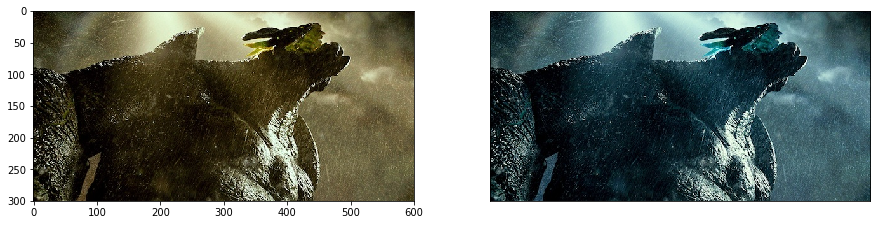

In [2]:
I = cv.imread("kaiju.jpg",1)
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(I) # <=============== BGR
plt.subplot(122), plt.imshow(I[...,::-1]) # <===== RGB 
plt.xticks([]), plt.yticks([]);

In [3]:
print(I.shape)
I[54,469]

(300, 600, 3)


array([72, 63, 43], dtype=uint8)

(300, 600)


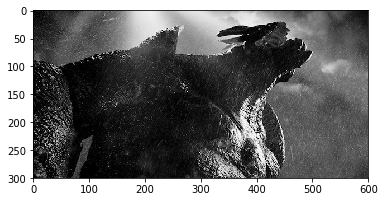

In [4]:
Ig = cv.cvtColor(I,cv.COLOR_BGR2GRAY)
print(Ig.shape)
plt.imshow(Ig, cmap='gray')
cv.imwrite('kaiju_gray.jpg',Ig);

## Dealing with videos...

Now, read the next video and store its frames:

<img src="video.gif">

490.0
1.0


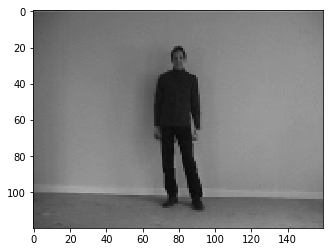

In [5]:
V = cv.VideoCapture("video.avi")
ret,f = V.read()
plt.imshow(f[...,::-1])

print(V.get(cv.CAP_PROP_FRAME_COUNT))

print(V.get(cv.CAP_PROP_POS_FRAMES))

In [6]:
# bash command
!mkdir frames 

V.set(cv.CAP_PROP_POS_FRAMES, 0); 
ret,f = V.read()
counter = 0
while ret:
    counter += 1
    fname = "frames/frame"+str(counter)+".jpg"
    cv.imwrite(fname, f)
    print("Generating frame "+str(counter))
    ret,f = V.read()

mkdir: cannot create directory ‘frames’: File exists
Generating frame 1
Generating frame 2
Generating frame 3
Generating frame 4
Generating frame 5
Generating frame 6
Generating frame 7
Generating frame 8
Generating frame 9
Generating frame 10
Generating frame 11
Generating frame 12
Generating frame 13
Generating frame 14
Generating frame 15
Generating frame 16
Generating frame 17
Generating frame 18
Generating frame 19
Generating frame 20
Generating frame 21
Generating frame 22
Generating frame 23
Generating frame 24
Generating frame 25
Generating frame 26
Generating frame 27
Generating frame 28
Generating frame 29
Generating frame 30
Generating frame 31
Generating frame 32
Generating frame 33
Generating frame 34
Generating frame 35
Generating frame 36
Generating frame 37
Generating frame 38
Generating frame 39
Generating frame 40
Generating frame 41
Generating frame 42
Generating frame 43
Generating frame 44
Generating frame 45
Generating frame 46
Generating frame 47
Generating frame

Generating frame 473
Generating frame 474
Generating frame 475
Generating frame 476
Generating frame 477
Generating frame 478
Generating frame 479
Generating frame 480
Generating frame 481
Generating frame 482
Generating frame 483
Generating frame 484
Generating frame 485
Generating frame 486
Generating frame 487
Generating frame 488
Generating frame 489
Generating frame 490


Inside the frame folder you will find the generated video frames:

<img src="frames.png">

## Arithmetic Operations on Images

We can perform arithmetic operations over images. See how to average the frames of this video: 

<img src="street.gif">

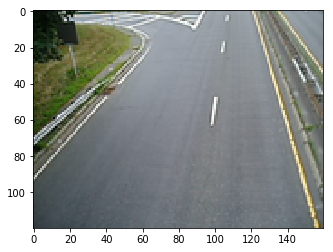

In [9]:
V = cv.VideoCapture("street.avi")

H = V.get(cv.CAP_PROP_FRAME_HEIGHT)
W = V.get(cv.CAP_PROP_FRAME_WIDTH)
frameSum = np.zeros(shape=(int(H),int(W),3))

ret,f = V.read()
while ret:
    frameSum += f
    ret,f = V.read()

Nf = V.get(cv.CAP_PROP_FRAME_COUNT)
frameAvg = frameSum/Nf
frameAvg = frameAvg.astype(np.uint8)

plt.imshow(frameAvg[...,::-1]);

Then, implement a simple substraction between the average frame and some frame with a car passing by:

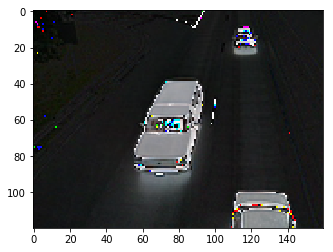

In [10]:
V.set(cv.CAP_PROP_POS_FRAMES, 39);
ret,f = V.read()
plt.imshow((frameAvg - f)[...,::-1]);

## Image Blending

(300, 600, 3)


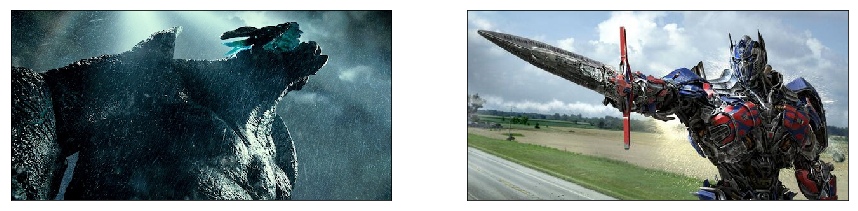

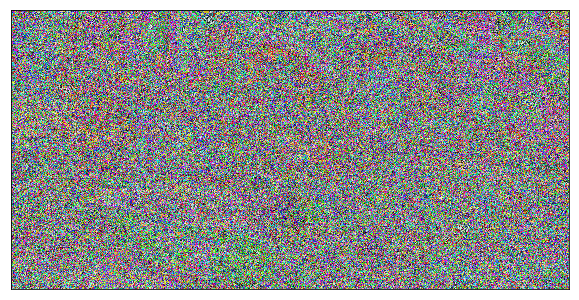

In [11]:
I1 = cv.imread('kaiju.jpg')
I2 = cv.imread('optimus.jpg')

alpha = 0.6
blending = alpha*I1 + (1-alpha)*I2
#cv.addWeighted(I1,alpha,I2,1-alpha,0)
print(blending.shape)

cv.imwrite("bleding.png", blending)

plt.figure(figsize=(15,20))
plt.subplot(121)
plt.imshow(I1[...,::-1]); 
plt.xticks([]), plt.yticks([]);
plt.subplot(122)
plt.imshow(I2[...,::-1]);
plt.xticks([]), plt.yticks([]);

plt.figure(figsize=(10,15))
plt.imshow(blending[...,::-1]);
plt.xticks([]), plt.yticks([]);

## Image Multiplication

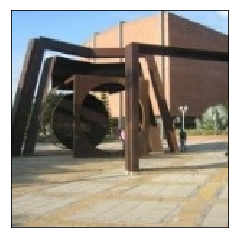

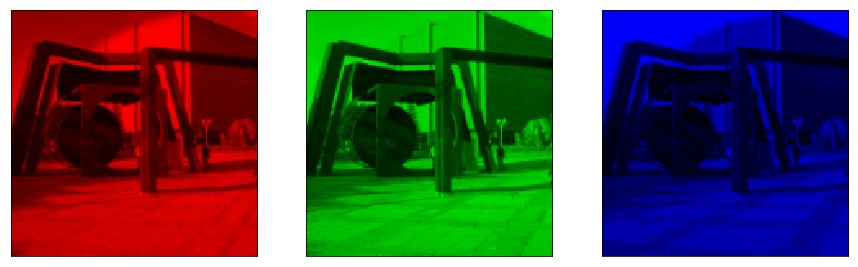

In [12]:
U = cv.imread('u.jpg')
plt.imshow(U[...,::-1]);
plt.xticks([]), plt.yticks([]);

UR = np.zeros(shape=(151,151,3),dtype=np.uint8); 
UR[:,:,2] = U[:,:,2];
UG = np.zeros(shape=(151,151,3),dtype=np.uint8); 
UG[:,:,1] = U[:,:,1];
UB = np.zeros(shape=(151,151,3),dtype=np.uint8); 
UB[:,:,0] = U[:,:,0];

plt.figure(figsize=(15,20))
plt.subplot(131)
plt.imshow(UR[...,::-1]); 
plt.xticks([]), plt.yticks([]);
plt.subplot(132)
plt.imshow(UG[...,::-1]);
plt.xticks([]), plt.yticks([]);
plt.subplot(133)
plt.imshow(UB[...,::-1]);
plt.xticks([]), plt.yticks([]);

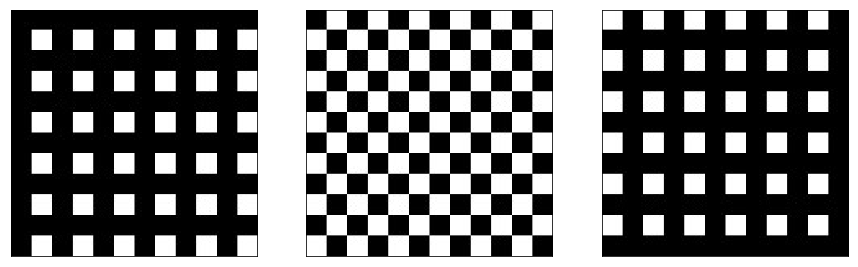

In [13]:
m1 = cv.imread('m1.jpg'); m1 = m1[:,:,0];
m2 = cv.imread('m2.jpg'); m2 = m2[:,:,0];
m3 = cv.imread('m3.jpg'); m3 = m3[:,:,0];

plt.figure(figsize=(15,20))
plt.subplot(131)
plt.imshow(m1,cmap='gray'); 
plt.xticks([]), plt.yticks([]);
plt.subplot(132)
plt.imshow(m2,cmap='gray');
plt.xticks([]), plt.yticks([]);
plt.subplot(133)
plt.imshow(m3,cmap='gray');
plt.xticks([]), plt.yticks([]);

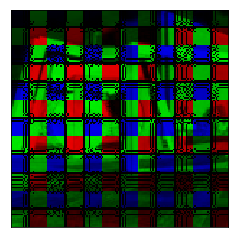

In [14]:
UN = np.zeros(shape=(151,151,3));

m1 = np.array(m1/255,dtype=np.uint8); 
m2 = np.array(m2/255,dtype=np.uint8); 
m3 = np.array(m3/255,dtype=np.uint8); 

UN[:,:,2] = cv.multiply(UR[:,:,2],m1);
UN[:,:,1] = cv.multiply(UG[:,:,1],m2);
UN[:,:,0] = cv.multiply(UB[:,:,0],m3);
plt.imshow(UN[...,::-1]);
plt.xticks([]), plt.yticks([]);